# Preparing working environnment

In [1]:
import pandas as pd
import numpy as np
import PIL

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Import dataset
data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
# Dropping unnecessary columns
data = data[['uniq_id', 'product_category_tree', 'image']]

In [4]:
# Retrieving categories
df_categ = data['product_category_tree'].str.split(pat = '>>', expand = True)
df_categ[0] = df_categ[0].apply(lambda x: str(x)[2:] if str(x)[:2] == '["' else x)
for c in np.arange(0,7,1):
    df_categ[c] = df_categ[c].apply(lambda x: str(x)[:-2] if str(x)[-2:] == '"]' else x)
    
data = data.join(df_categ.iloc[:,:2])
data.rename(columns = {0 : 'category', 1 : 'subcategory'}, inplace = True)
data.drop(columns = 'product_category_tree', inplace = True)

In [5]:
data

,uniq_id,image,category,subcategory
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,Bed Linen
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,Baby & Kids Gifts
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,Baby & Kids Gifts
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,Baby & Kids Gifts
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,Baby & Kids Gifts


# Testing processing on a single image

In [6]:
data['image'][0]

'55b85ea15a1536d46b7190ad6fff8ce7.jpg'

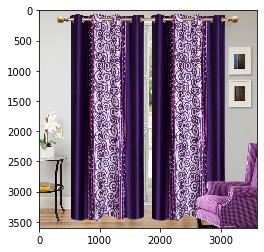

In [7]:
# Loading an image
image_path = 'Flipkart/Images/'
test_img = PIL.Image.open(image_path + data['image'][0])
plt.imshow(test_img, cmap = 'binary_r')

In [8]:
test_img.mode

'RGB'

In [9]:
test_img.size

(3600, 3600)

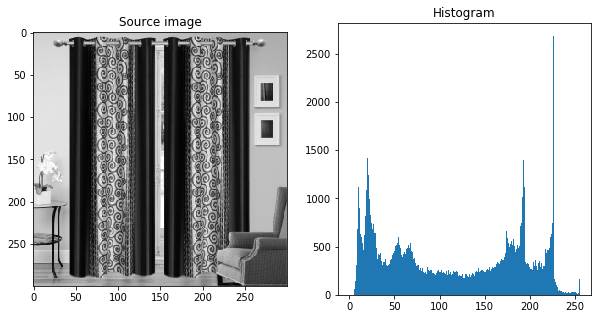

In [10]:
# Converting to black and white, rescaling & getting histogram
test_img2 = test_img.convert(mode = 'L')
factor = int(min(test_img.size)/300)
test_img2 = test_img2.reduce(factor)

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(test_img2, cmap = 'binary_r')
plt.title('Source image')

plt.subplot(122)
plt.hist(np.array(test_img2).flatten(), bins = range(256))
plt.title('Histogram')
plt.show()

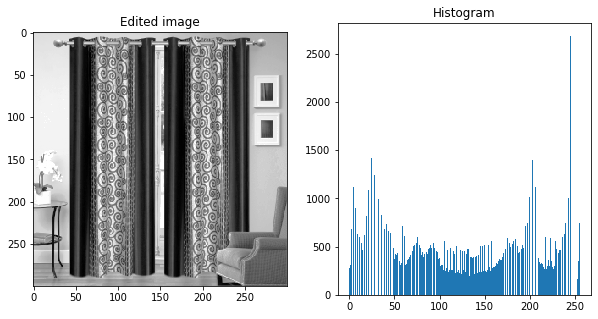

In [11]:
# Enhancing contrast and brightness
from PIL import ImageOps

test_img_ac = ImageOps.autocontrast(test_img2)
test_img_eq = ImageOps.equalize(test_img_ac)

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(test_img_eq, cmap = 'binary_r')
plt.title('Edited image')

plt.subplot(122)
plt.hist(np.array(test_img_eq).flatten(), bins = range(256))
plt.title('Histogram')
plt.show()

In [12]:
save_path = 'Flipkart/Edited_Images/'
test_img_eq.save(save_path + data['image'][0])

# Editing all images

In [17]:
image_path = 'Flipkart/Images/'
save_path = 'Flipkart/Edited_Images/'

for i in range(len(data['image'])):
    im_name = data['image'][i]
    img = PIL.Image.open(image_path + im_name)
    img = img.convert(mode = 'L')
    factor = int(min(img.size)/300)
    factor = 1 if factor == 0 else factor
    img = img.reduce(factor)
    img = ImageOps.autocontrast(img)
    img = ImageOps.equalize(img)
    img.save(save_path + im_name)

C:\Users\alexa_000\Anaconda3\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


# Testing SIFT algorithm

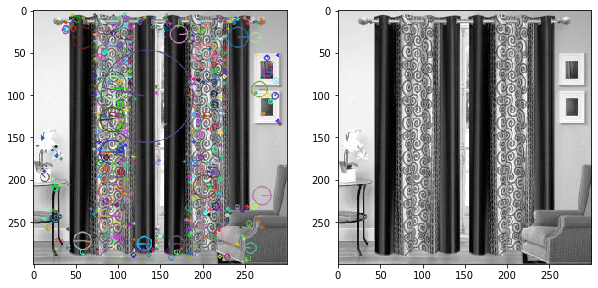

In [26]:
import cv2 as cv
test_img = cv.imread(save_path + data['image'][0])
sift = cv.SIFT_create()
gray= cv.cvtColor(test_img,cv.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)
cv.drawKeypoints(gray, kp, test_img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(test_img)
plt.subplot(122)
plt.imshow(gray, cmap = 'binary_r')
plt.show()

In [20]:
kp, des = sift.detectAndCompute(gray, None)

In [54]:
des.shape

(643, 128)

In [34]:
# Example of a descriptor
des[0]

array([ 19.,  69., 146.,  52.,   0.,   0.,   0.,   3.,  23., 109., 133.,
        30.,   2.,   0.,   0.,   0.,  97., 146.,  10.,   3.,   1.,   0.,
         0.,   0.,   6.,   8.,   2.,  22.,   8.,   0.,   0.,   0., 110.,
        53.,  28.,   8.,   2.,   0.,   0.,  54.,  85.,  51.,  19.,  35.,
        18.,   1.,   0.,   4., 146.,  85.,   2.,   2.,   1.,   0.,   0.,
         8.,  28.,   5.,   1.,   6.,   7.,   4.,   0.,   1.,  24.,  91.,
        34.,  12.,   2.,   0.,   0.,  12., 139.,  27.,  26.,  28.,   4.,
         0.,   0.,  19., 146.,  11.,   0.,   0.,   0.,   0.,   0.,  38.,
        25.,   5.,   0.,   0.,   0.,   1.,   0.,   1.,  15.,  33.,  11.,
         5.,   4.,   9.,  25.,  10., 146.,  26.,  10.,   0.,   0.,   2.,
         3.,  65., 146.,   4.,   0.,   0.,   0.,   0.,   0.,  70.,   3.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [80]:
# Normalization and clipping
def norm_clip(descriptor):
    des_clip = np.clip(descriptor/np.linalg.norm(descriptor),0, 0.2)
    des_norm = des_clip/np.linalg.norm(des_clip)
    return des_norm

# Normalize all descriptors of detected feature
des_n = np.apply_along_axis(norm_clip, 1, des)

In [81]:
# Creation of a descriptor dataset
pd.DataFrame(des_n)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.045014,0.163472,0.242617,0.123197,0.000000,0.000000,0.000000,0.007107,0.054491,0.242617,...,0.000000,0.165842,0.007107,0.002369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.007207,0.009609,0.007207,0.004805,0.012012,0.012012,0.004805,0.019219,0.052851,0.024023,...,0.012012,0.007207,0.019219,0.242636,0.246331,0.246331,0.100898,0.000000,0.000000,0.000000
2,0.008951,0.229367,0.229367,0.015664,0.000000,0.000000,0.000000,0.006713,0.002238,0.181257,...,0.000000,0.105174,0.002238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002238
3,0.002398,0.000000,0.000000,0.040772,0.026382,0.000000,0.004797,0.004797,0.033577,0.040772,...,0.165487,0.215853,0.031179,0.007195,0.007195,0.002398,0.000000,0.000000,0.002398,0.026382
4,0.033866,0.194164,0.151267,0.115144,0.074505,0.000000,0.000000,0.015804,0.185133,0.230892,...,0.004515,0.149009,0.058701,0.004515,0.000000,0.002258,0.000000,0.000000,0.000000,0.022577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.035516,0.000000,0.000000,0.022832,0.235929,0.000000,0.000000,0.002537,0.260107,0.000000,...,0.000000,0.000000,0.000000,0.015221,0.096401,0.000000,0.000000,0.000000,0.000000,0.000000
639,0.000000,0.073527,0.163137,0.000000,0.000000,0.000000,0.004595,0.000000,0.000000,0.071229,...,0.000000,0.071229,0.039061,0.032168,0.002298,0.000000,0.000000,0.000000,0.000000,0.004595
640,0.085231,0.071774,0.008972,0.002243,0.002243,0.026915,0.053830,0.044859,0.029158,0.080745,...,0.000000,0.000000,0.154762,0.229820,0.000000,0.000000,0.006729,0.011215,0.000000,0.000000
641,0.000000,0.000000,0.002685,0.016107,0.155705,0.000000,0.000000,0.000000,0.241611,0.002685,...,0.010738,0.013423,0.010738,0.029530,0.134228,0.005369,0.000000,0.000000,0.000000,0.000000


# Finding all descriptors

In [101]:
# Calculating and storing descriptors for all images
df_descr = pd.DataFrame()
data['descriptors'] = np.nan

for i in range(len(data)):
    
    # Load image and calculate descriptors
    im_name = data['image'][i]
    img = cv.imread(save_path + data['image'][i])
    sift = cv.SIFT_create()
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    
    # Normalize descriptors and store list of descriptors in database
    des_n = np.apply_along_axis(norm_clip, 1, des)
    data['descriptors'][i] = str(des_n)
    
    # Store normalized descriptors in a dedicated dataset
    df_ = pd.DataFrame(des_n)
    df_descr = df_descr.append(df_)

C:\Users\alexa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\alexa_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
df_descr.shape

(1414260, 128)

In [103]:
df_descr.shape[0]/data.shape[0]

1346.9142857142858

In [105]:
# Saving dataframes
data.to_pickle('df_image.pkl')
df_descr.to_pickle('df_descr.pkl')

# Searching visual words with clustering

In [106]:
# Loading descriptor dataframe
df_descr = pd.read_pickle('df_descr.pkl')

In [114]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_descr)

In [115]:
# Working on a smaller dataset for clustering
df_descr_shrink = data_scaled[:10000]

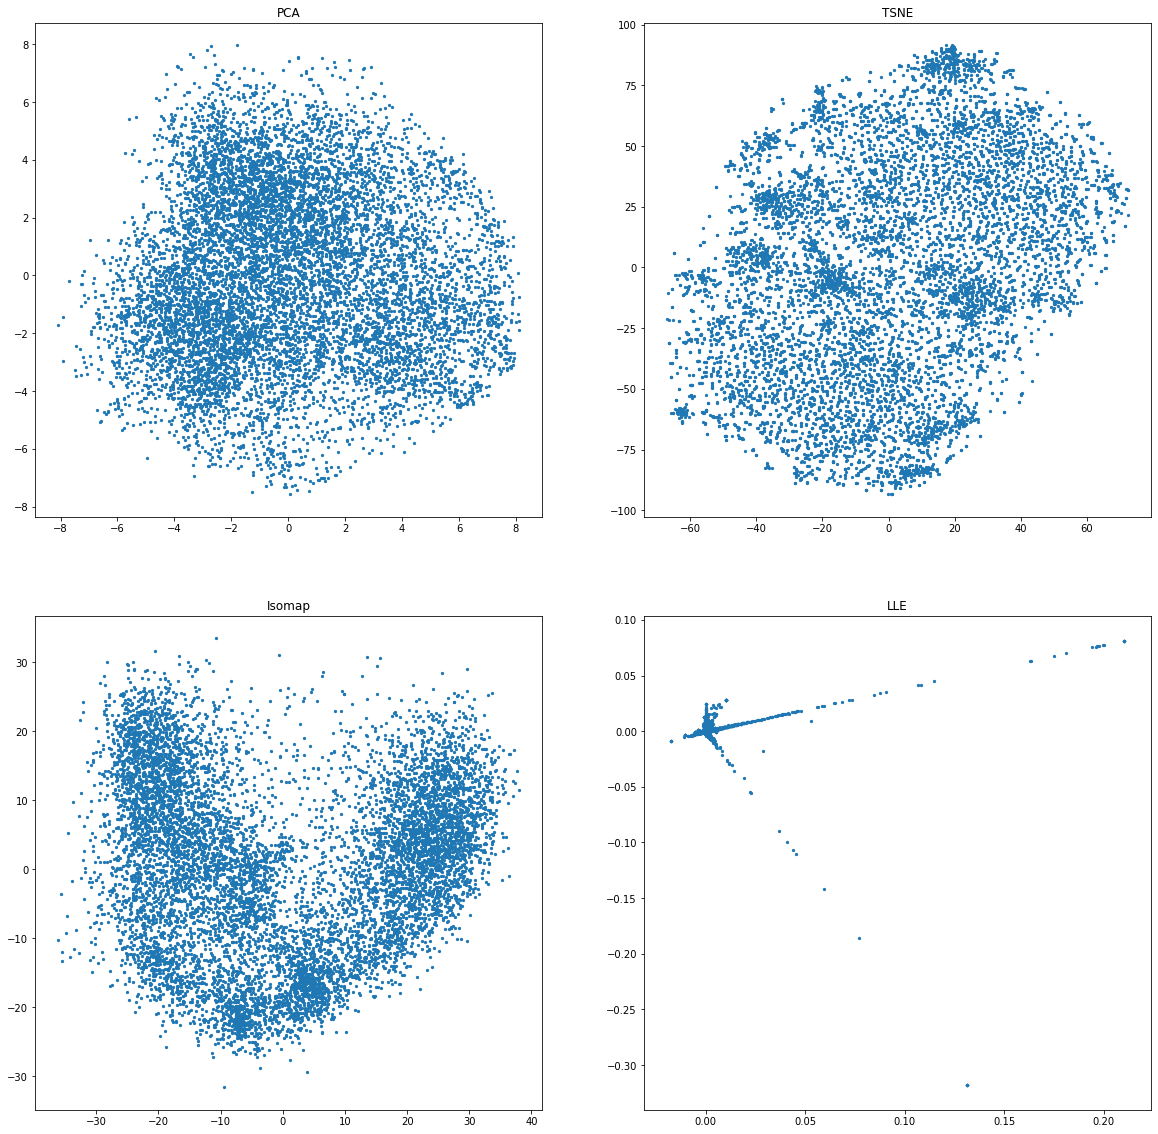

In [116]:
# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding

# Initialize RDim models
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
iso = Isomap(n_components = 2)
lle = LocallyLinearEmbedding(n_components = 2)

# Transform data
desc_pca = pca.fit_transform(df_descr_shrink)
desc_tsne = tsne.fit_transform(df_descr_shrink)
desc_iso = iso.fit_transform(df_descr_shrink)
desc_lle = lle.fit_transform(df_descr_shrink)

# Visualization
plt.figure(figsize = (20,20))
plt.subplot(221)
plt.scatter(desc_pca[:,0], desc_pca[:,1], s=5)
plt.title('PCA')

plt.subplot(222)
plt.scatter(desc_tsne[:,0], desc_tsne[:,1], s=5)
plt.title('TSNE')

plt.subplot(223)
plt.scatter(desc_iso[:,0], desc_iso[:,1], s=5)
plt.title('Isomap')

plt.subplot(224)
plt.scatter(desc_lle[:,0], desc_lle[:,1], s=5)
plt.title('LLE')
plt.show()